 ## Problem Set 3 Solution
 


##  Ques1. 
### Importing DataSet Occupations and perform various operations as mentioned in the ques.

In [66]:
# Step1
# Import the necessary libraries 

import pandas as pd

# Steps 2 & 3
# Import the dataset and assign it to a variable called "users"

users_url = r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'
users = pd.read_csv(url , sep='|', index_col='user_id')
users.head()

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [68]:
users.tail()

,age,gender,occupation,zip_code
user_id,,,,
939,26,F,student,33319
940,32,M,administrator,02215
941,20,M,student,97229
942,48,F,librarian,78209
943,22,M,student,77841


In [67]:
# Step 4
# the mean age per occupation 

occupation = users.groupby('occupation')
occupation['age'].mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [69]:
# Step 5
# the Male ratio per occupation and sort it from the most to the least  

users['gender_num'] = users['gender'].apply(lambda x : 1 if x == 'M' else 0)
users['gender_num']
users.head()


,age,gender,occupation,zip_code,gender_num
user_id,,,,,
1,24,M,technician,85711,1
2,53,F,other,94043,0
3,23,M,writer,32067,1
4,24,M,technician,43537,1
5,33,F,other,15213,0


In [70]:
males = users.groupby('occupation')['gender_num'].sum().sort_values(ascending = False)
males

occupation
student          136
educator          69
other             69
engineer          65
programmer        60
administrator     43
executive         29
scientist         28
technician        26
writer            26
librarian         22
marketing         16
entertainment     16
artist            15
retired           13
lawyer            10
salesman           9
doctor             7
healthcare         5
none               5
homemaker          1
Name: gender_num, dtype: int64

In [74]:
total = users.occupation.value_counts()
total

males/total*100


administrator     54.430380
artist            53.571429
doctor           100.000000
educator          72.631579
engineer          97.014925
entertainment     88.888889
executive         90.625000
healthcare        31.250000
homemaker         14.285714
lawyer            83.333333
librarian         43.137255
marketing         61.538462
none              55.555556
other             65.714286
programmer        90.909091
retired           92.857143
salesman          75.000000
scientist         90.322581
student           69.387755
technician        96.296296
writer            57.777778
dtype: float64

In [75]:
# Step 6
# minimum age for each occupation

occupation['age'].min()

occupation
administrator    21
artist           19
doctor           28
educator         23
engineer         22
entertainment    15
executive        22
healthcare       22
homemaker        20
lawyer           21
librarian        23
marketing        24
none             11
other            13
programmer       20
retired          51
salesman         18
scientist        23
student           7
technician       21
writer           18
Name: age, dtype: int64

In [76]:
# maximum age for each occupation

occupation['age'].max()


occupation
administrator    70
artist           48
doctor           64
educator         63
engineer         70
entertainment    50
executive        69
healthcare       62
homemaker        50
lawyer           53
librarian        69
marketing        55
none             55
other            64
programmer       63
retired          73
salesman         66
scientist        55
student          42
technician       55
writer           60
Name: age, dtype: int64

In [77]:
# Step 7
# For each combination of occupation and sex, calculate the mean age 

users.groupby(['occupation','gender'])['age'].mean().apply(int)

occupation     gender
administrator  F         40
               M         37
artist         F         30
               M         32
doctor         M         43
educator       F         39
               M         43
engineer       F         29
               M         36
entertainment  F         31
               M         29
executive      F         44
               M         38
healthcare     F         39
               M         45
homemaker      F         34
               M         23
lawyer         F         39
               M         36
librarian      F         40
               M         40
marketing      F         37
               M         37
none           F         36
               M         18
other          F         35
               M         34
programmer     F         32
               M         33
retired        F         70
               M         62
salesman       F         27
               M         38
scientist      F         28
               M         3

In [80]:
# Step 8
# For each occupation present the percentage of women and men

total_employees = users.groupby(['occupation']).agg('count')
total_employees


,age,gender,zip_code,gender_num
occupation,,,,
administrator,79,79,79,79
artist,28,28,28,28
doctor,7,7,7,7
educator,95,95,95,95
engineer,67,67,67,67
entertainment,18,18,18,18
executive,32,32,32,32
healthcare,16,16,16,16
homemaker,7,7,7,7


In [79]:
males_females = users.groupby(['occupation', 'gender']).agg({'gender' : 'count'})
males_females

gender
occupation    gender        
administrator F           36
              M           43
artist        F           13
              M           15
doctor        M            7
educator      F           26
              M           69
engineer      F            2
              M           65
entertainment F            2
              M           16
executive     F            3
              M           29
healthcare    F           11
              M            5
homemaker     F            6
              M            1
lawyer        F            2
              M           10
librarian     F           29
              M           22
marketing     F           10
              M           16
none          F            4
              M            5
other         F           36
              M           69
programmer    F            6
              M           60
retired       F            1
              M           13
salesman      F            3
              M            9
scientist     F            3
              M           28
student       F           60
              M          136
technician    F            1
              M           26
writer        F           19
              M           26

In [130]:
gender_per =  males_females.div(total_employees, level = 'occupation') * 100
gender_per.loc[:,'gender'].round(1)

occupation     gender
administrator  F          45.6
               M          54.4
artist         F          46.4
               M          53.6
doctor         M         100.0
educator       F          27.4
               M          72.6
engineer       F           3.0
               M          97.0
entertainment  F          11.1
               M          88.9
executive      F           9.4
               M          90.6
healthcare     F          68.8
               M          31.2
homemaker      F          85.7
               M          14.3
lawyer         F          16.7
               M          83.3
librarian      F          56.9
               M          43.1
marketing      F          38.5
               M          61.5
none           F          44.4
               M          55.6
other          F          34.3
               M          65.7
programmer     F           9.1
               M          90.9
retired        F           7.1
               M          92.9
salesman       F 

## Ques 2.

### Euro Teams Dataset

In [55]:
# Step 1
# import necessary libraries

import pandas as pd

# Step 2 & Step 3
# import csv file and assign to euro12

euro12_url = r'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_&_Sorting/Euro12/Euro_2012_stats_TEAM.csv'
euro12 = pd.read_csv(euro_url)
euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [56]:
# Step 4

# select Only column "Goals" from dataframe 

euro12['Goals'] 

#other method to select a column
#euro12.Goals

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [141]:
# Step 5
# Numbere of the teams participated in the Euro 2012

#total number of unique teams
euro12['Team'].nunique()

16

In [166]:
# Step 6
# Number of columns in the dataset

len(euro12.columns)

#other method to see number of columns
# euro12.shape[1]


35

In [167]:
euro12.columns

Index(['Team', 'Goals', 'Shots on target', 'Shots off target',
       'Shooting Accuracy', '% Goals-to-shots', 'Total shots (inc. Blocked)',
       'Hit Woodwork', 'Penalty goals', 'Penalties not scored', 'Headed goals',
       'Passes', 'Passes completed', 'Passing Accuracy', 'Touches', 'Crosses',
       'Dribbles', 'Corners Taken', 'Tackles', 'Clearances', 'Interceptions',
       'Clearances off line', 'Clean Sheets', 'Blocks', 'Goals conceded',
       'Saves made', 'Saves-to-shots ratio', 'Fouls Won', 'Fouls Conceded',
       'Offsides', 'Yellow Cards', 'Red Cards', 'Subs on', 'Subs off',
       'Players Used'],
      dtype='object')

In [172]:
# Step 7
# select only columns "Team","Yellow Cards" and "Red Cards"
# assign these columns to the dataframe discipline

discipline = euro12[['Team','Yellow Cards','Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [180]:
# Step 8
# Sort the teams by Red Cards, then to Yellow Cards 

discipline.sort_values(['Red Cards', 'Yellow Cards'])

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


In [186]:
# Step 9 
# the mean of Yellow Cards given per Team

discipline.groupby('Team')['Yellow Cards'].mean().sort_values(ascending = False)


Team
Italy                  16
Portugal               12
Spain                  11
Greece                  9
Croatia                 9
Sweden                  7
Poland                  7
Czech Republic          7
Russia                  6
Republic of Ireland     6
France                  6
Ukraine                 5
Netherlands             5
England                 5
Germany                 4
Denmark                 4
Name: Yellow Cards, dtype: int64

In [200]:
# Step 10
# Filter teams that scored more than 6 goals

euro12[euro12.Goals>6].Team

5     Germany
13      Spain
Name: Team, dtype: object

In [203]:
# Goals scored by each team
# verify above result by looking at the data 

euro12[['Team','Goals']]

,Team,Goals
0,Croatia,4
1,Czech Republic,4
2,Denmark,4
3,England,5
4,France,3
5,Germany,10
6,Greece,5
7,Italy,6
8,Netherlands,2
9,Poland,2


In [209]:
# Step 11
# Teams that start with G

euro12[euro12.Team.str.startswith('G')]['Team']

5    Germany
6     Greece
Name: Team, dtype: object

In [227]:
# Step 12
# Select the first 7 columns

euro12.iloc[:,0:7].head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65


In [216]:
# to see values of first 7 columns
# To see only names of first 7 columns 

euro12.iloc[:, 0:7].columns

Index(['Team', 'Goals', 'Shots on target', 'Shots off target',
       'Shooting Accuracy', '% Goals-to-shots', 'Total shots (inc. Blocked)'],
      dtype='object')

In [224]:
# Step 13 
# Select all columns except the last 3 

euro12.iloc[:, 0:-3].head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0


In [229]:
# ALL Column names except last 3

euro12.iloc[:-3].columns

# euro12.iloc[:, 0:-3].columns

Index(['Team', 'Goals', 'Shots on target', 'Shots off target',
       'Shooting Accuracy', '% Goals-to-shots', 'Total shots (inc. Blocked)',
       'Hit Woodwork', 'Penalty goals', 'Penalties not scored', 'Headed goals',
       'Passes', 'Passes completed', 'Passing Accuracy', 'Touches', 'Crosses',
       'Dribbles', 'Corners Taken', 'Tackles', 'Clearances', 'Interceptions',
       'Clearances off line', 'Clean Sheets', 'Blocks', 'Goals conceded',
       'Saves made', 'Saves-to-shots ratio', 'Fouls Won', 'Fouls Conceded',
       'Offsides', 'Yellow Cards', 'Red Cards', 'Subs on', 'Subs off',
       'Players Used'],
      dtype='object')

In [241]:
# Step 14
# the Shooting Accuracy from England, Italy and Russia 

filter = euro12[euro12.Team.isin(['England','Italy','Russia'])]
filter[['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


## Ques 3.

### Housing DataSet

In [9]:
# Step 1
# import nessecary libraries

import pandas as pd
import numpy as np
import random 

# step 2 
# Create 3 different Series, each of length 100, as follows: 
# random number from 1 to 4 
# random number from 1 to 3 
# random number from 10,000 to 30,000 

first = [[random.randint(1, 4)] for i in range(100)]
series_1 = pd.DataFrame(first)
series_1

second = [[random.randint(1, 3)] for i in range(100)]
series_2 = pd.DataFrame(second)
series_2

third = [[random.randint(10000, 30000)] for i in range(100)]
series_3 = pd.DataFrame(third)
series_3



,0
0,22431
1,20148
2,11414
3,14134
4,19175
...,...
95,25971
96,17997
97,19735
98,22378


In [12]:
# Step 3
# Create a DataFrame by joinning the Series by columns

data_frame = pd.concat([series_1, series_2, series_3], axis=1)
data_frame

,0,0,0
0,4,1,22431
1,2,3,20148
2,2,1,11414
3,3,3,14134
4,1,3,19175
...,...,...,...
95,3,2,25971
96,1,3,17997
97,3,3,19735
98,2,3,22378


In [14]:
# Step 4
# Change the name of the columns to bedrs, bathrs, price_sqr_meter 

data_frame.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
data_frame

,bedrs,bathrs,price_sqr_meter
0,4,1,22431
1,2,3,20148
2,2,1,11414
3,3,3,14134
4,1,3,19175
...,...,...,...
95,3,2,25971
96,1,3,17997
97,3,3,19735
98,2,3,22378


In [41]:
# Step 5
# Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn' 

new_data_frame = pd.DataFrame(data_frame['bedrs'].append(data_frame['bathrs']).append(data_frame['price_sqr_meter']))
new_data_frame.columns = ['bigcolumn']
new_data_frame


,bigcolumn
0,4
1,2
2,2
3,3
4,1
...,...
95,25971
96,17997
97,19735
98,22378


In [43]:
# Step 6
# Ops it seems it is going only until index 99. Is it true?

new_data_frame

# Yes, It is going untill index 99 only, whereas the total rows are 300.

,bigcolumn
0,4
1,2
2,2
3,3
4,1
...,...
95,25971
96,17997
97,19735
98,22378


In [51]:
# Step 7
# Reindex the DataFrame so it goes from 0 to 299

new_index = new_data_frame.reset_index(drop=True)
new_index

,bigcolumn
0,4
1,2
2,2
3,3
4,1
...,...
295,25971
296,17997
297,19735
298,22378


## Ques 4.

### Wind Statistics Dataset

In [202]:
# Step 1
# Import the necessary libraries
import pandas as pd

# import datetime library for Step 4
import datetime

# Step 2 and Step 3 
# Import the dataset & assign it to a variable called "data" 
# and replace the first 3 columns by a proper datetime index

data_url = r'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data'
data = pd.read_csv(data_url,sep ='\s+',parse_dates = [[0,1,2]])
data

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [204]:
# Step 4
# Create a function to fix irrelavant dates issue from Yr_Mo_Dy column

def fix_year(date):
  year = date.year - 100 if date.year > 1989 else date.year
  return datetime.date(year, date.month, date.day)

# apply function to the column "Yr_Mo_Dy" using apply method 
data['Yr_Mo_Dy'] = data['Yr_Mo_Dy'].apply(fix_year)

data

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [205]:
# Step 5

# change to datatype datetime64[ns]
data["Yr_Mo_Dy"] = pd.to_datetime(data["Yr_Mo_Dy"])

# set 'Yr_Mo_Dy' as the index
data = data.set_index('Yr_Mo_Dy')

data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [206]:
# Step 6
# number of values missing for each location over the entire record

null_values = data.isnull().sum()
null_values

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [207]:
# Step 7
# how many non-missing values are there in total

# the number of totals rows

total_rows = data.shape[0]
total_rows

6574

In [196]:
# total_values for each location

total_values_location = total_values-null_values
total_values_location

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

In [208]:
# non missing values total

total_values_location.sum()

78857

In [209]:
# Step 8
# the mean windspeed of the windspeeds over all the locations and all the times

data.iloc[0:].sum().sum().mean()

806540.2299999988

In [210]:
# Step 9
# calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days

#create daataframe called "loc_stats"
loc_stats = data.describe()
loc_stats.loc[['mean','std','min','max'],:]

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000


In [211]:
# Step 10
# Create a DataFrame called day_stats and
# Calculate the min, max and mean windspeed and 
# standard deviations of the windspeeds across all the locations at each day.

data_stats = pd.DataFrame()

# adding new columns to dataframe " data_stats" and 
# performing different required functions on each row

data_stats['min'] = data.min(axis=1)
data_stats['max'] = data.max(axis=1) 
data_stats['mean'] = data.mean(axis=1)
data_stats['std'] = data.std(axis=1)

data_stats

,min,max,mean,std
Yr_Mo_Dy,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


In [235]:
# Step 11
# the average windspeed in January for each location
# Treat January 1961 and January 1962 both as January


data.loc[data.index.month == 1].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [259]:
# Step 12
# Downsample the record to a yearly frequency for each location

yearly = data.resample('Y').mean()
yearly.index = yearly.index.to_period('Y')
yearly

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


In [261]:
# Step 13
# Downsample the record to a monthly frequency for each location

monthly = data.resample('M').mean()
monthly.index = monthly.index.to_period('M')
monthly

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


In [260]:
# Step 14
# Downsample the record to a weekly frequency for each location

weekly = data.resample('W').mean()
weekly.index = weekly.index.to_period('W')
weekly

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1960-12-26/1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-02/1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-09/1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-16/1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-23/1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-11-27/1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-04/1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-11/1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


In [269]:
# Step 15
# Calculate the min, max and mean windspeeds and
# standard deviations of the windspeeds across all locations for each week 

each_week = data.resample('W').agg(['min','max','mean','std'])

# assume that the first week starts on January 2 1961) for the first 52 weeks

each_week.loc[each_week.index[1:53], : ]

RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
Yr_Mo_Dy                                                                 
1961-01-08  10.58  18.50  13.541429  2.631321   6.63  16.88  11.486667   
1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   8.967143   
1961-01-22   4.92  19.83  13.204286  5.337402   3.42  14.37   9.862857   
1961-01-29  13.62  25.04  19.880000  4.619061   9.96  23.91  16.141429   
1961-02-05  10.58  24.21  16.827143  5.251408   9.46  24.21  15.460000   
1961-02-12  16.00  24.54  19.684286  3.587677  11.54  21.42  16.417143   
1961-02-19   6.04  22.50  15.130000  5.064609  11.63  20.17  15.091429   
1961-02-26   7.79  25.80  15.221429  7.020716   7.08  21.50  13.625714   
1961-03-05  10.96  13.33  12.101429  0.997721   8.83  17.00  12.951429   
1961-03-12   4.88  14.79   9.376667  3.732263   8.08  16.96  11.578571   
1961-03-19   4.92  16.88  11.911429  3.860036   9.46  15.54  13.501429   
1961-03-26   6.29  15.00   9.567143  3.613298   2.58  11.63   8.387143   
1961-04-02   5.88  18.25  10.757143  5.046922   3.50  16.29   8.852857   
1961-04-09   4.50  18.12  11.964286  4.604392   7.04  14.62  10.654286   
1961-04-16   4.71  15.50   8.965714  3.937727   4.83  12.25   8.000000   
1961-04-23   4.00  21.09  12.621429  5.676655   3.71  15.41  10.438571   
1961-04-30   4.08  16.29  10.117143  4.349662   6.50  14.46   9.798571   
1961-05-07   9.87  23.00  15.367143  5.025507  10.29  19.79  13.970000   
1961-05-14   3.54  12.79   7.772857  3.371022   3.96  15.12   8.712857   
1961-05-21   4.88  15.04   8.225714  3.631730   3.58  10.17   5.631667   
1961-05-28   4.96  11.79   8.155714  2.739433   3.67  12.50   7.388571   
1961-06-04   7.00  15.92  10.321429  3.099701   4.75   9.79   7.407143   
1961-06-11   8.29  14.42  10.917143  2.248597   6.83  11.54   8.992857   
1961-06-18   6.13  14.33  10.571429  3.009482   4.12  14.54   9.565714   
1961-06-25   4.00   9.00   7.345714  1.982035   3.25   9.50   6.108571   
1961-07-02   7.21  13.13  10.236667  2.557856   6.34  14.37   9.482857   
1961-07-09   7.29  17.50  11.715714  3.664855   3.75  10.75   7.220000   
1961-07-16   8.63  22.50  16.680000  5.168710   7.87  19.29  13.518571   
1961-07-23   3.04   5.88   4.202857  1.047978   2.92   6.79   4.255714   
1961-07-30   6.13  16.08  10.561429  4.157641   4.63  13.79   8.445714   
1961-08-06   7.67  16.08  10.870000  2.950887   5.09  15.79   8.792857   
1961-08-13   2.88  14.21  10.058333  4.422268   4.42  10.00   7.941429   
1961-08-20  13.13  18.91  15.607143  2.283635   7.25  13.62  10.565714   
1961-08-27   7.67  18.16  12.391429  3.395857   6.87  14.58  11.430000   
1961-09-03   3.63  14.46   8.678571  4.398615   1.13  22.00   8.821429   
1961-09-10   5.00  17.62  10.541429  5.207278   3.04  13.59   8.798571   
1961-09-17   5.33  28.75  17.160000  7.679190   7.12  22.08  14.440000   
1961-09-24   6.92  10.25   8.500000  1.267399   2.92  13.62   7.154286   
1961-10-01  10.34  23.21  16.044286  4.559572   6.96  13.62  11.361667   
1961-10-08   3.13  16.08  11.250000  5.596710   3.63  16.96   8.757143   
1961-10-15   3.71  17.12  10.881667  4.780675   6.13  13.25   9.734286   
1961-10-22  10.46  28.62  19.260000  7.888314   3.75  19.46  13.364286   
1961-10-29   4.33  26.42  16.077143  7.957637   2.75  21.25  11.867143   
1961-11-05   5.88  15.79  11.571429  3.369201   3.96  13.46   9.590000   
1961-11-12   5.46  16.08  10.428571  3.939811   5.50  10.75   7.690000   
1961-11-19   7.50  15.00  10.798571  2.784358   4.21  13.00   7.951429   
1961-11-26   5.75  14.29   9.154286  3.214368   3.29  11.79   7.337143   
1961-12-03   7.92  23.75  12.608571  5.704669   4.67  18.71  10.442857   
1961-12-10  10.83  23.71  17.362857  4.890152   9.21  21.37  14.362857   
1961-12-17   9.29  21.34  14.985714  4.095106   8.63  17.62  13.472857   
1961-12-24  11.46  24.41  15.757143  4.959717   9.79  16.13  11.971429   
1961-12-31   5.04 

## Ques 5.

### Chipo Dataset


In [130]:
# Step 1
# import necessary libraries

import pandas as pd

# Step 2 & 3
# import dataset and assign it to the variable "chipo"

url_chipo = r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url_chipo, sep = '\t')
chipo.head()


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [129]:
# Step 4
# See the first 10 entries

chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [30]:
# Step 5
# the number of observations in the dataset

# number of rows
chipo.shape[0]

4622

In [31]:
# Step 6
# the number of columns in the dataset

chipo.shape[1]

5

In [45]:
# Step 7
# Print the name of all the columns

chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [124]:
# Step 8
# How is the dataset indexed? 

chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [135]:
# step 9
# Which was the most-ordered item?

most_ordered = chipo.groupby('item_name')['quantity'].sum().sort_values(ascending =  False)
most_ordered.head(1).,

item_name
Chicken Bowl    761
Name: quantity, dtype: int64

In [149]:
# Step 10
# For the most-ordered item, how many items were ordered? 

chipo.groupby('item_name')['quantity'].sum().max()

761

In [161]:
# Step 11
# the most ordered item in the choice_description column

max_order_choice = chipo.groupby('choice_description').sum().sort_values('quantity',ascending = False)
max_order_choice.head(1)


,order_id,quantity
choice_description,,
[Diet Coke],123455,159


In [164]:
# Step 12
# items ordered in total

chipo['quantity'].sum()

4972

In [170]:
# Step 13
# Check the item price type

chipo.item_price.dtype

dtype('O')

In [175]:
# Create a lambda function and change the type of item price into float

# create lambda function which converts type of a string value from index 1 to -1 to float type
func = lambda x : float(x[1:-1])

# apply lambda function to the column "item_price"
chipo['item_price'] = chipo.item_price.apply(lambda x : float(x[1:-1])) 

In [176]:
# check again item price type

chipo.item_price.dtype

dtype('float64')

In [215]:
# Step 14
# the revenue for the period in the dataset

per_order = chipo['quantity'] * chipo['item_price']
revenue = per_order.sum()
revenue

39237.02

In [216]:
# Step 15
# the number of orders made in the period

num_orders = chipo.order_id.max()
num_orders

1834

In [217]:
# Step 16
# the average revenue amount per order

avg_amount = revenue / num_orders
avg_amount

21.39423118865867

In [236]:
# Step 17
# number of different items sold

chipo.item_name.value_counts().count()

50

## Ques 6.

### Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend. Don't forget to label your axes! 

In [2]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt

# import csv file
marriage_divorce = pd.read_csv(r'C:\Users\Abhishek\Desktop\Files\us-marriages-divorces-1867-2014.csv')

marriage_divorce

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3
...,...,...,...,...,...,...
140,2007,2197000.0,856000.0,301696000,7.3,2.8
141,2008,2157000.0,844000.0,304543000,7.1,2.8
142,2009,2080000.0,840000.0,307240000,6.8,2.7
143,2010,2096000.0,872000.0,309776000,6.8,2.8


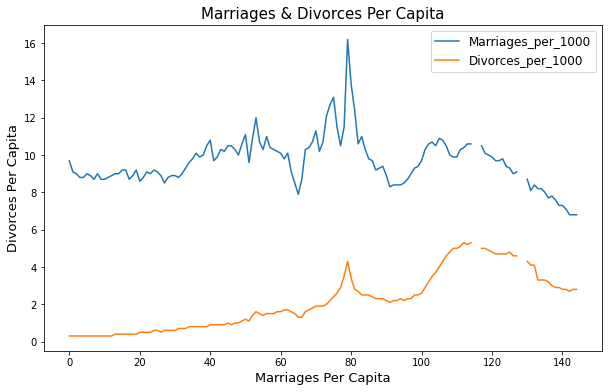

In [121]:
years = marriage_divorce['Year'].values
marriages_per_capita = marriage_divorce['Marriages_per_1000']
divorces_per_capita = marriage_divorce['Divorces_per_1000']

fig = plt.subplots(figsize=(10, 6))

marriages_per_capita.plot.line()
divorces_per_capita.plot.line()

plt.title("Marriages & Divorces Per Capita", fontsize = 15)
plt.xlabel("Marriages Per Capita", fontsize = 13)
plt.ylabel("Divorces Per Capita", fontsize = 13)
plt.legend(fontsize = 12)

plt.show()

## Ques 7.

### Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.

In [5]:
# import nessecary libraries

import pandas as pd
import matplotlib.pyplot as plt

# # import csv file
marriage_data =  pd.read_csv(r'C:\Users\Abhishek\Desktop\Files\us-marriages-divorces-1867-2014.csv')
marriage_data

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3
...,...,...,...,...,...,...
140,2007,2197000.0,856000.0,301696000,7.3,2.8
141,2008,2157000.0,844000.0,304543000,7.1,2.8
142,2009,2080000.0,840000.0,307240000,6.8,2.7
143,2010,2096000.0,872000.0,309776000,6.8,2.8


In [18]:
us_marriage_data = marriage_data[marriage_data['Year'].apply(lambda x: x in [1900, 1950, 2000])]
years = us_marriage_data['Year']

years

33     1900
83     1950
133    2000
Name: Year, dtype: int64

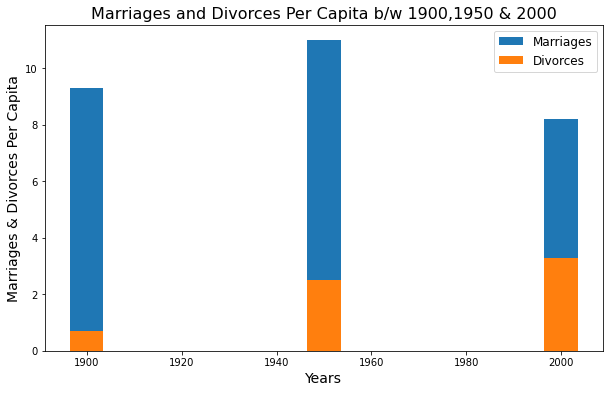

In [115]:
marriages_per_capita1 = us_marriage_data['Marriages_per_1000']
divorces_per_capita1 = us_marriage_data['Divorces_per_1000']

fig = plt.subplots(figsize=(10, 6))

plt.bar(years, marriages_per_capita1, width = 7)
plt.bar(years, divorces_per_capita1, width = 7)

plt.title("Marriages and Divorces Per Capita b/w 1900,1950 & 2000", fontsize = 16)
plt.xlabel("Years",fontsize = 14)
plt.ylabel("Marriages & Divorces Per Capita", fontsize = 14)
plt.legend(['Marriages','Divorces'],fontsize = 12)

plt.show()

## Ques 8.

### Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name. 


In [157]:
# import essential libraries

import pandas as pd
import matplotlib.pyplot as plt

# import csv file
actor_kills = pd.DataFrame()
actor_kills = pd.read_csv(r'C:\Users\Abhishek\Desktop\Files\actor_kill_counts.csv')
actor_kills_sort = actor_kills.sort_values('Count',ascending = False)
actor_kills_sort

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
7,Sylvester Stallone,267
4,Dolph Lundgren,239
8,Tomisaburo Wakayama,226
2,Clint Eastwood,207
6,Nicolas Cage,204
5,Jet Li,201
3,Clive Owen,194
9,Wesley Snipes,193


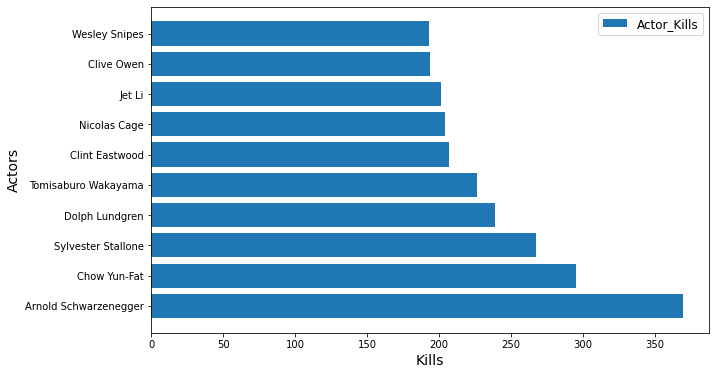

In [202]:
fig = plt.subplots(figsize=(10, 6))

x = actor_kills_sort['Actor']
y = actor_kills_sort['Count']
plt.barh(x,y)

plt.xlabel('Kills', fontsize = 14)
plt.ylabel('Actors', fontsize = 14)
plt.legend(['Actor_Kills'],fontsize = 12)

## Ques 9.

### Create a pie chart showing the fraction of all Roman Emperors that were assassinated. 

In [254]:
# import essential libraries

import pandas as pd
import matplotlib.pyplot as plt

# import csv file

roman_emperors = pd.read_csv(r'C:\Users\Abhishek\Desktop\Files\roman-emperor-reigns.csv')
roman_emperors

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide
...,...,...,...
63,Valentinian I,11.00,Natural causes
64,Valens,14.00,Killed in battle
65,Gratian,16.00,Assassinated
66,Valentinian II,17.00,Possibly assassinated


Text(0.5, 1.0, 'Assassinated Roman Emperors')

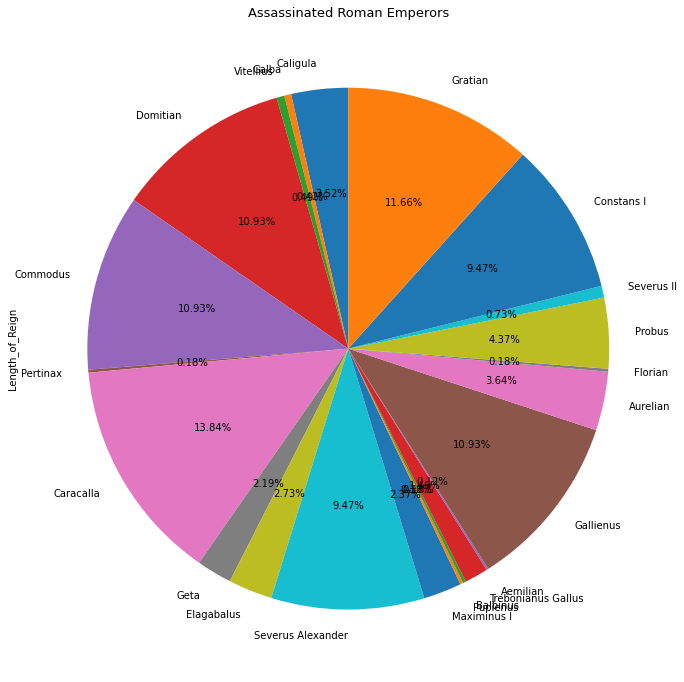

In [304]:
assassinated_emperors = roman_emperors[roman_emperors['Cause_of_Death'].apply(lambda x: 'Assassinated' in x)]
assassinated_emperors
emperors = assassinated_emperors['Emperor']
length = assassinated_emperors['Length_of_Reign']

length.plot(kind='pie',labels=emperors, figsize = (12,12), autopct='%0.2f%%',
            radius = 1, startangle=90)

plt.title('Assassinated Roman Emperors',size = 13)


## Ques 10.

### Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009. 

In [323]:
# import essential libraries

import pandas as pd
import matplotlib.pyplot as plt

arcade_revenue = pd.read_csv(r'C:\Users\Abhishek\Desktop\Files\arcade-revenue-vs-cs-doctorates.csv')
arcade_revenue

total_revenue = arcade_revenue['Total Arcade Revenue (billions)']
cs_phds = arcade_revenue['Computer Science Doctorates Awarded (US)']
year = arcade_revenue['Year']

In [313]:
arcade_revenue

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948
5,2005,1.435,1129
6,2006,1.601,1453
7,2007,1.654,1656
8,2008,1.803,1787
9,2009,1.734,1611


Text(0, 0.5, 'PhDs')

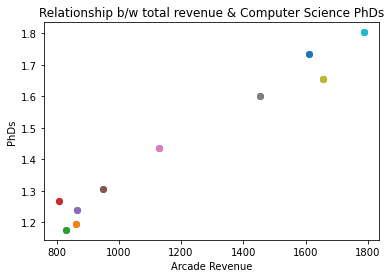

In [336]:
# create a figure and axis
fig, ax = plt.subplots()

ax.scatter(cs_phds, total_revenue)

for i in range(len(year)):
     ax.scatter(cs_phds[i], total_revenue[i])

ax.set_title('Relationship b/w total revenue & Computer Science PhDs')
ax.set_xlabel('Arcade Revenue')
ax.set_ylabel('PhDs')
